# Objective of the project
The objective of this project is to build a prediction model to predict next day maximum temperature in a city based on one year of past weather data by using Random forest algorithm 

# Approach/Activities
The activities include data acqusistion, Identifying and rectifying data Anomalies, data preparation, One-Hot Encoding, visualizing decision tree and building prediction model using random forest.

# Data Set Information
Weather data for Seattle, WA from 2016 using the NOAA Climate Data Online tool has been downloaded for the analysis.
Below is the link for weather data wherein data can be extracted for any city in USA.

https://www.ncdc.noaa.gov/cdo-web/

The data for the year 2016 for Seattle, WA has been downloaded and saved as 'temps.csv' in the folder

https://github.com/shivaaniket/ML-DS-Projects-Python/tree/master/Prediction-Random%20Forest

Below is the description of columns :

year: 2016 for all data points

month: number for month of the year

day: number for day of the year

week: day of the week as a character string

temp_2: max temperature 2 days prior

temp_1: max temperature 1 day prior

average: historical average max temperature

actual: max temperature measurement

expert: your expert's prediction, a random number between 20 below the average and 20 above the average


In [1]:
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('G:/ML, Analytics and AI/Portfolio/Prediction-Random Forest/temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,expert
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


##  Data cleaning and preparation


In [2]:
# Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,expert
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [3]:
# Using datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# Convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [4]:
# Importing matplotlib for Plots 
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

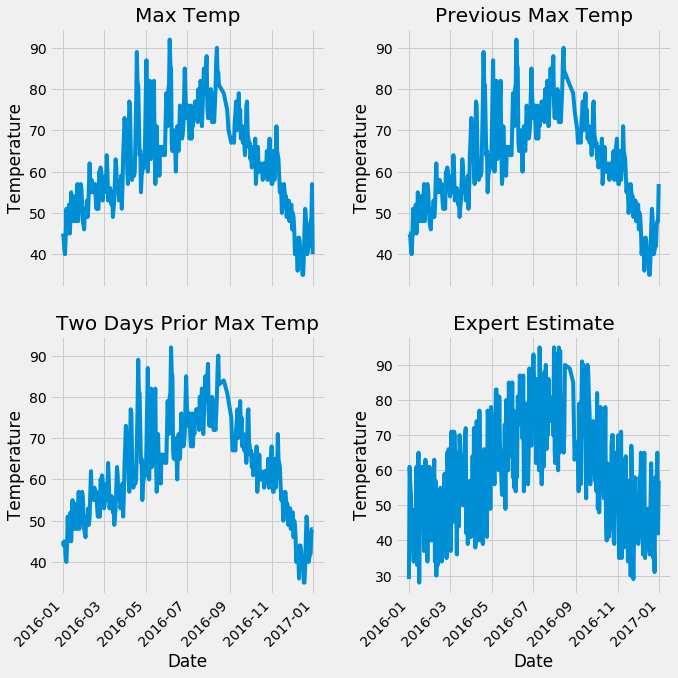

In [5]:
# Plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Expert Estimate
ax4.plot(dates, features['expert'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Expert Estimate')

plt.tight_layout(pad=2)

## One-Hot Encoding

In [6]:
# One-hot encode categorical features
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,expert,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [7]:
print('Shape of features after one-hot encoding:', features.shape)

('Shape of features after one-hot encoding:', (348, 15))


## Converting Data to Arrays

In [8]:
# Import numpy to convert to arrays
import numpy as np

# Labels are the values to be predicted
labels = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)


## Training and Testing Data Sets


In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Spliting the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (261, 14))
('Training Labels Shape:', (261,))
('Testing Features Shape:', (87, 14))
('Testing Labels Shape:', (87,))


## Establishing Baseline


In [11]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

('Average baseline error: ', 5.06, 'degrees.')


## Training the Model


In [12]:
# Importing the RandomForest from sklearn
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

## Predictions on Test Data


In [13]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 3.83, 'degrees.')


In [75]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

## Model Performance/Accuracy


In [76]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 93.99, '%.')


## Visualizing a Single Decision Tree


In [77]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import pydotplus

In [85]:
tree = rf.estimators_[5]

In [79]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [80]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [81]:
from sklearn import tree
from os import system


In [82]:
graph.write_png("tree.png");

In [83]:
from PIL import Image
image = Image.open('tree.png')
image.show()

## Decision Tree


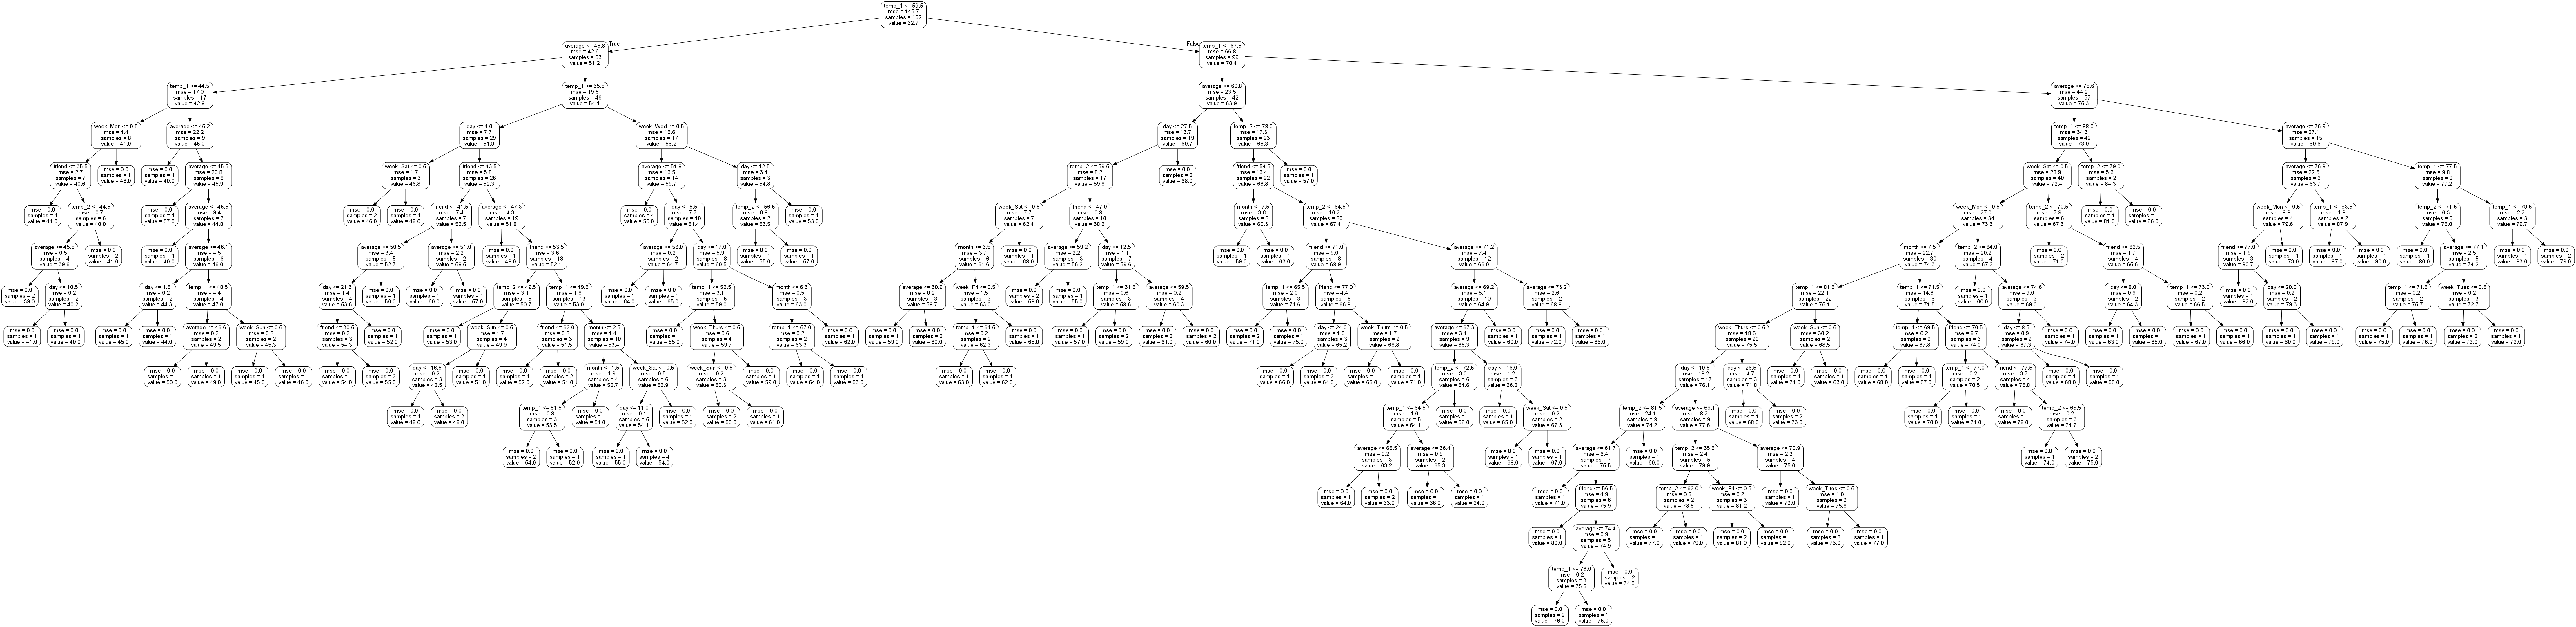



















In [87]:
print('The depth of this tree is:', tree.tree_.max_depth)

('The depth of this tree is:', 15)


## Smaller tree for visualization

In [90]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

In [94]:
from PIL import Image
image = Image.open('small_tree.png')
image.show()

## 
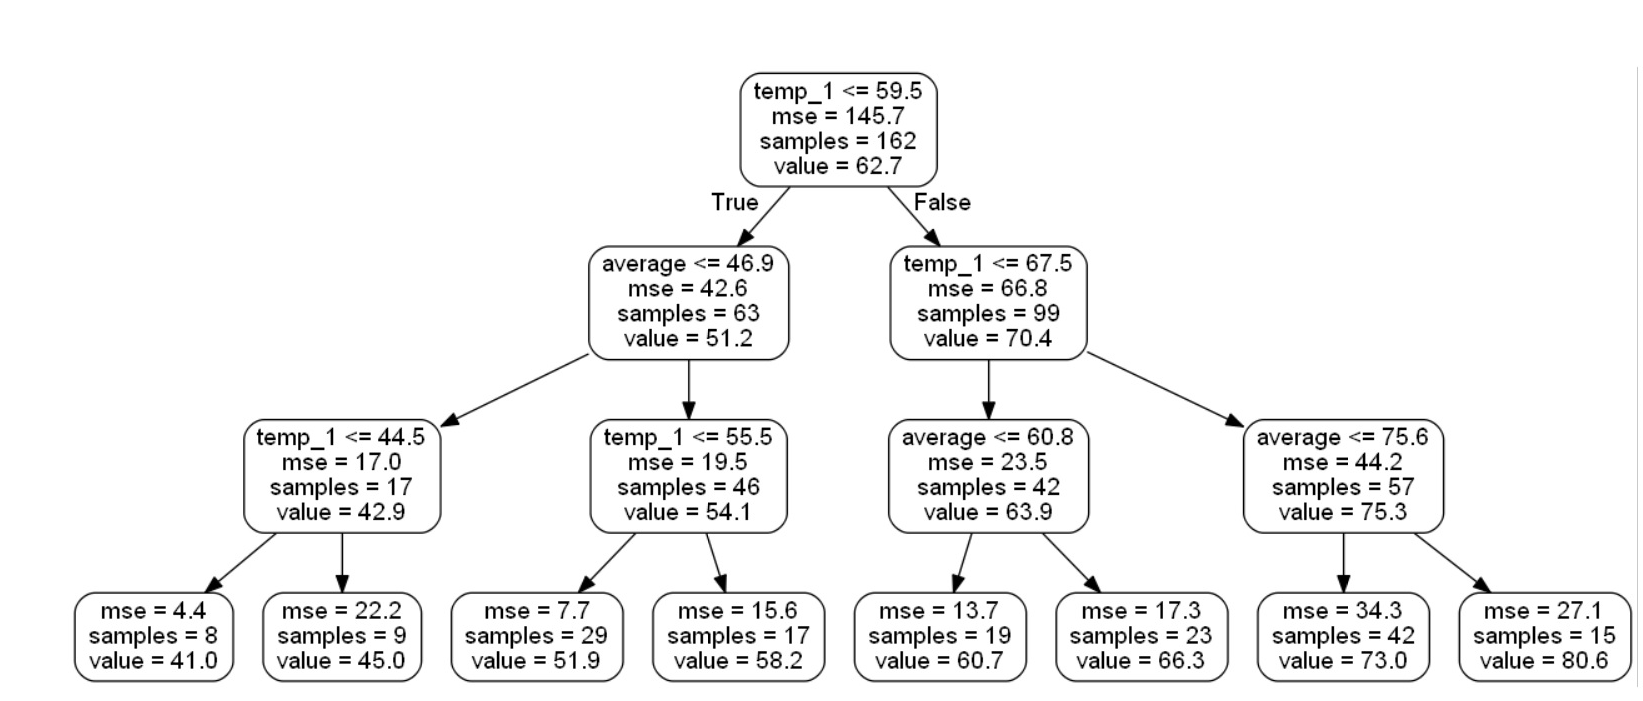

## Variable Importances


In [96]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)



In [127]:
# Print out the feature and importances 
print[("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];


['Variable: temp_1               Importance: 0.7', 'Variable: average              Importance: 0.19', 'Variable: day                  Importance: 0.03', 'Variable: temp_2               Importance: 0.02', 'Variable: expert               Importance: 0.02', 'Variable: month                Importance: 0.01', 'Variable: year                 Importance: 0.0', 'Variable: week_Fri             Importance: 0.0', 'Variable: week_Mon             Importance: 0.0', 'Variable: week_Sat             Importance: 0.0', 'Variable: week_Sun             Importance: 0.0', 'Variable: week_Thurs           Importance: 0.0', 'Variable: week_Tues            Importance: 0.0', 'Variable: week_Wed             Importance: 0.0']


In [112]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

('Mean Absolute Error:', 3.92, 'degrees.')
('Accuracy:', 93.77, '%.')


## Variable Importances Visualizations

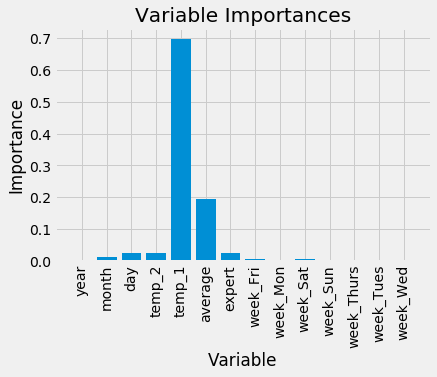

In [117]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Predictions and Actual Values

In [118]:
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

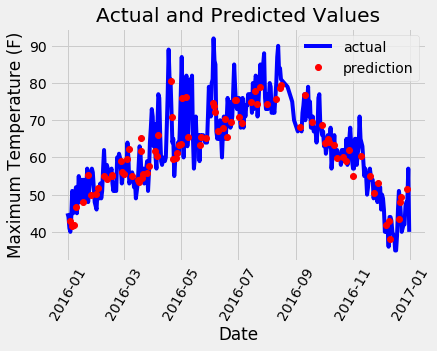

In [119]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

## Targets and Data Visualization


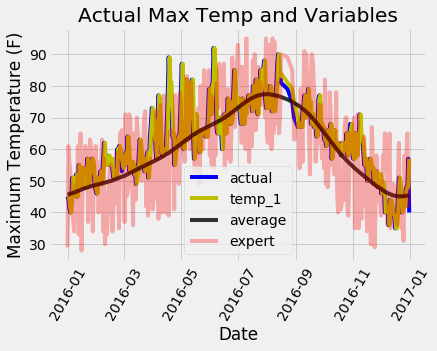

In [122]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['expert'] = features[:, feature_list.index('expert')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['expert'], 'r-', label = 'expert', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');